<a href="https://colab.research.google.com/github/khushurs98/Deep-Learning-Algo/blob/main/Fruit_classification_Apple_banana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d karimabdulnabi/fruit-classification10-class

 92% 27.0M/29.2M [00:02<00:00, 23.6MB/s]
100% 29.2M/29.2M [00:02<00:00, 13.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-classification10-class.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/MY_data/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/MY_data/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 2301 files belonging to 10 classes.
Found 1025 files belonging to 10 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
72/72 [==============================] - 31s 246ms/step - loss: -719446.1250 - accuracy: 0.1008 - val_loss: -320617.8750 - val_accuracy: 0.1024
Epoch 2/10
72/72 [==============================] - 8s 105ms/step - loss: -17177238.0000 - accuracy: 0.1000 - val_loss: -9088676.0000 - val_accuracy: 0.1024
Epoch 3/10
72/72 [==============================] - 8s 107ms/step - loss: -114122928.0000 - accuracy: 0.1000 - val_loss: -107345960.0000 - val_accuracy: 0.1024
Epoch 4/10
72/72 [==============================] - 8s 109ms/step - loss: -420679424.0000 - accuracy: 0.1000 - val_loss: -319960064.0000 - val_accuracy: 0.1024
Epoch 5/10
72/72 [==============================] - 8s 105ms/step - loss: -1131726848.0000 - accuracy: 0.1000 - val_loss: -1000357952.0000 - val_accuracy: 0.1024
Epoch 6/10
72/72 [==============================] - 9s 126ms/step - loss: -2489839360.0000 - accuracy: 0.1000 - val_loss: -2279100928.0000 - val_accuracy: 0.1024
Epoch 7/10
72/72 [==========================

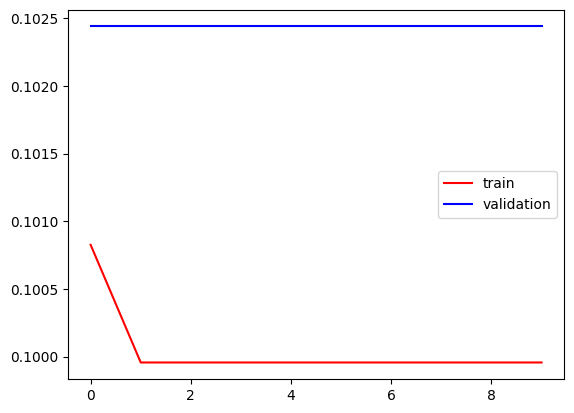

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

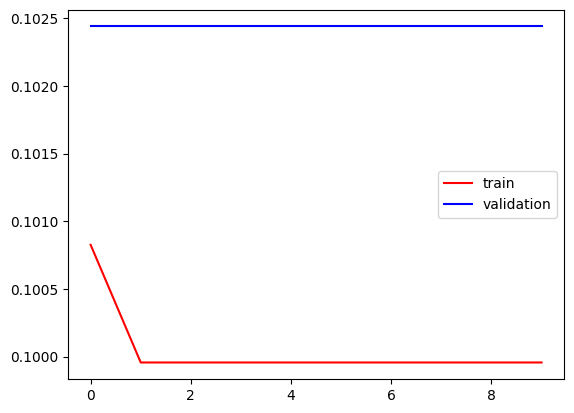

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

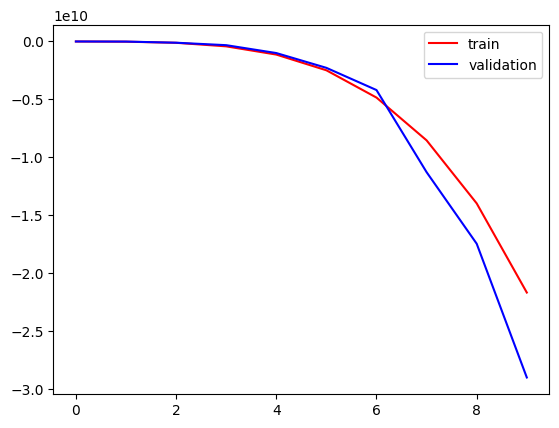

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

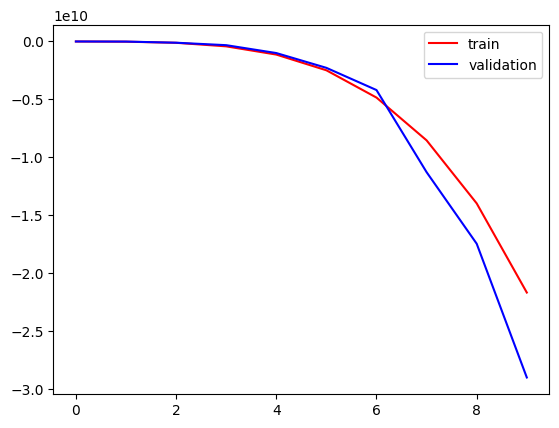

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
import cv2 as cv
import numpy as np
import argparse
import time

In [ ]:
test_img = cv2.imread('/content/m2.jfif')

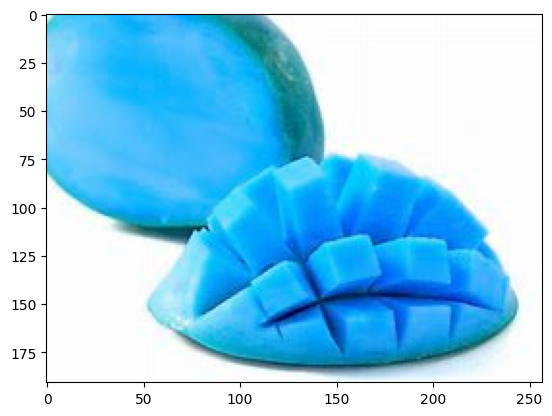

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/m2.jfif')
plt.imshow(img)

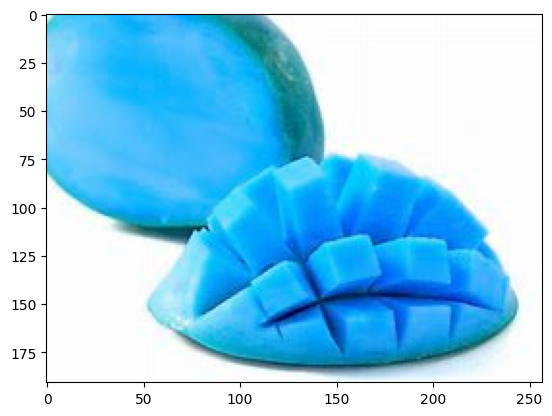

In [ ]:
plt.imshow(test_img)

In [ ]:
print(img.shape)
print(model.input_shape)

(191, 257, 3)
(None, 256, 256, 3)


In [ ]:
test_img.shape

(191, 257, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

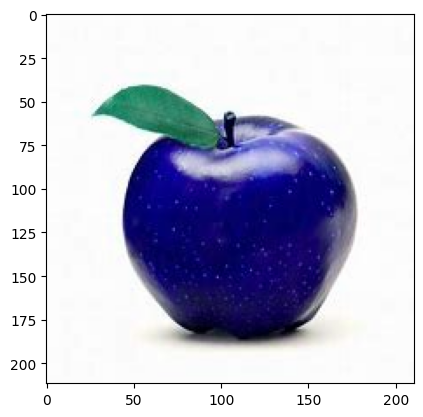

In [ ]:
img = cv.imread('/content/a.jfif')
plt.imshow(img)

In [ ]:
img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 37ms/step


array([[1.]], dtype=float32)